## Option 2: Pymaceuticals Inc

![Laboratory](images/Laboratory.jpg)

While your data companions rushed off to jobs in finance and government, you remained adamant that science was the way for you. Staying true to your mission, you've since joined Pymaceuticals Inc., a burgeoning pharmaceutical company based out of San Diego, CA. Pymaceuticals specializes in drug-based, anti-cancer pharmaceuticals. In their most recent efforts, they've since begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

As their Chief Data Analyst, you've been given access to the complete data from their most recent animal study. In this study, 250 mice were treated through a variety of drug regimes over the course of 45 days. Their physiological responses were then monitored over the course of that time. Your objective is to analyze the data to show how four treatments (**Capomulin, Infubinol, Ketapril, and Placebo**) compare.

In [20]:
#dependencies 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

#load files
trial_df = pd.read_csv('raw_data/clinicaltrial_data.csv')
drug_df = pd.read_csv('raw_data/mouse_drug_data.csv')

In [21]:
#check if mice dictionaries are identical in both df
np.array_equal(np.sort(trial_df['Mouse ID'].unique()), np.sort(drug_df['Mouse ID'].unique()))

True

In [22]:
#there are duplicates in drug)df
drug_df[drug_df.duplicated(subset='Mouse ID', keep=False).values]

,Mouse ID,Drug
7,g989,Stelasyn
173,g989,Propriva


In [23]:
#drop duplicates
drug_df = drug_df.drop_duplicates(subset='Mouse ID')

In [24]:
#leave only Capomulin, Infubinol, Ketapril, and Placebo for analysis
#create df with list of drugs to keep
drugs_list = pd.DataFrame(data={'Drug':['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']})

#merge with provided df to keep the only needed drugs
drug_df = pd.merge(drugs_list, drug_df, on='Drug')
drug_df.head()

,Drug,Mouse ID
0,Capomulin,b128
1,Capomulin,r944
2,Capomulin,s185
3,Capomulin,w914
4,Capomulin,l897


In [56]:
#combine data over city name
data_df = pd.merge(trial_df, drug_df, on='Mouse ID')

In [57]:
data_df = data_df.set_index('Drug')

In [58]:
data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug,,,,
Capomulin,b128,0,45.000000,0
Capomulin,b128,5,45.651331,0
Capomulin,b128,10,43.270852,0
Capomulin,b128,15,43.784893,0
Capomulin,b128,20,42.731552,0


# Creating a scatter plot that shows how the tumor volume changes over time for each treatment.

In [108]:
#calculate standard errors
tumor_error = data_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)'].unstack(level=0)
met_error = data_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites'].unstack(level=0)



tumor_error

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609
25,0.881642,0.550315,0.755413,1.034872
30,0.934460,0.631061,0.934121,1.218231
35,1.052241,0.984155,1.127867,1.287481
40,1.223608,1.055220,1.158449,1.370634


In [91]:
#pivot by drug and timepoint and tumor volume
by_drug = data_df.pivot_table(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
by_drug.head(3)

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329


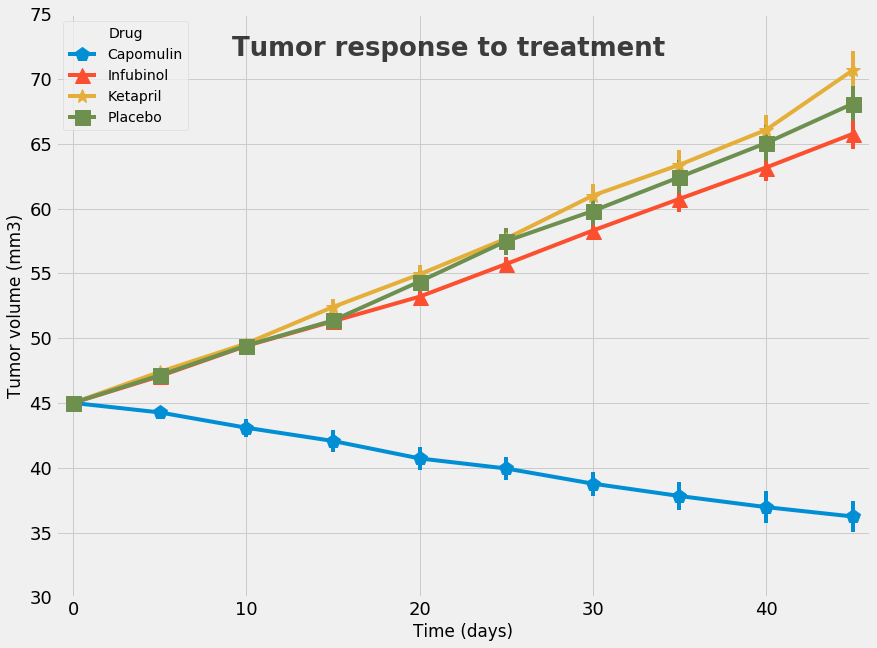

In [106]:
#set fivethirtyeight styles
mpl.style.use('fivethirtyeight')

#initialize figure 
f, ax = plt.subplots(figsize=(13,10))

#plot df
g = by_drug.plot(ax=ax, style='--', yerr=tumor_error)
g.tick_params(axis = 'both', which = 'both', labelsize = 18)

# create valid markers from mpl.markers
valid_markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'x', 'D', 'd', 'P', 'X']
markers = np.random.choice(valid_markers, by_drug.shape[1], replace=False)

for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])
    line.set_markersize(15)
#add legend
ax.legend(ax.get_lines(), by_drug.columns, loc='best', title='Drug')

#set titles
f.suptitle('Tumor response to treatment', y=0.85, fontsize = 26, weight = 'bold', alpha = .75)
plt.xlabel('Time (days)')
plt.ylabel('Tumor volume (mm3)')
plt.axis([-1, 46, 30, 75])

plt.show()

# Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.

In [32]:
#pivot by drug and timepoint and metastatic sites
met = data_df.pivot_table(index='Timepoint', columns='Drug', values='Metastatic Sites')
met.head(3)

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.00,0.000000,0.000000,0.000000
5,0.16,0.280000,0.304348,0.375000
10,0.32,0.666667,0.590909,0.833333


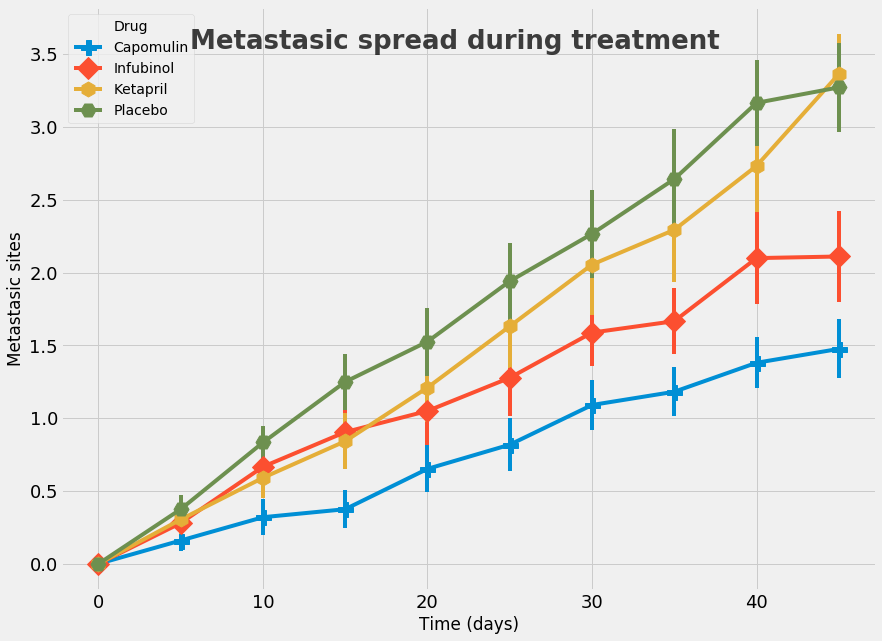

In [109]:
#set fivethirtyeight styles
mpl.style.use('fivethirtyeight')

#initialize figure 
f, ax = plt.subplots(figsize=(13,10))

#plot df
g = met.plot(ax=ax, style='--', yerr=met_error)
g.tick_params(axis = 'both', which = 'both', labelsize = 18)
#g.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

# create valid markers from mpl.markers
valid_markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'x', 'D', 'd', 'P', 'X']
markers = np.random.choice(valid_markers, by_drug.shape[1], replace=False)

for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])
    line.set_markersize(15)
#add legend
ax.legend(ax.get_lines(), by_drug.columns, loc='best', title='Drug')


#set titles
f.suptitle('Metastasic spread during treatment', y=0.85, fontsize = 26, weight = 'bold', alpha = .75)
plt.xlabel('Time (days)')
plt.ylabel('Metastasic sites')
#plt.axis([-1, 46, 30, 75])

plt.show()

# Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)

In [110]:
#pivot by drug and timepoint and mice count
mice = data_df.pivot_table(index='Timepoint', columns='Drug', values='Mouse ID',aggfunc= 'count')

mice.head(3)

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24


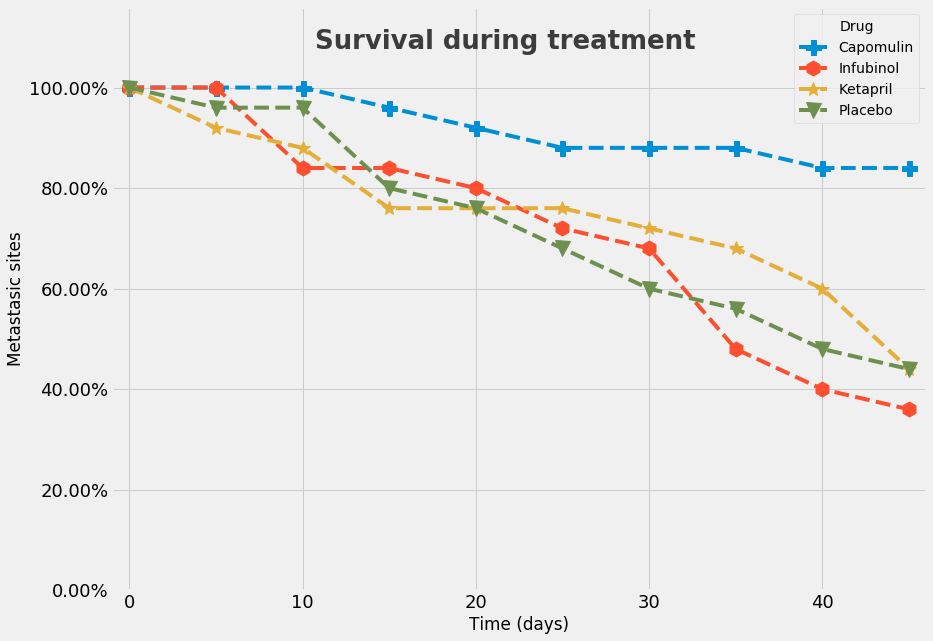

In [113]:
#set fivethirtyeight styles
mpl.style.use('fivethirtyeight')

#initialize figure 
f, ax = plt.subplots(figsize=(13,10))

#plot df
g = mice.plot(ax=ax, style='--')
g.tick_params(axis = 'both', which = 'both', labelsize = 18)
#g.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

# create valid markers from mpl.markers
valid_markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'x', 'D', 'd', 'P', 'X']
markers = np.random.choice(valid_markers, by_drug.shape[1], replace=False)

for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])
    line.set_markersize(15)
#add legend
ax.legend(ax.get_lines(), by_drug.columns, loc='best', title='Drug')


#set titles
f.suptitle('Survival during treatment', y=0.85, fontsize = 26, weight = 'bold', alpha = .75)
plt.xlabel('Time (days)')
plt.ylabel('Metastasic sites')
plt.axis([-1, 46, 0, 29])

vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x*4) for x in vals])

plt.show()

# Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

In [116]:
#pivot for plot
summary = data_df.pivot_table( \
    index=['Drug','Timepoint'], \
    values='Tumor Volume (mm3)', \
    aggfunc= 'mean' \
    ).reset_index('Timepoint')

#create df for plot
totals = pd.DataFrame()
totals['Drug'], totals['Tumor'] = '',''

#store only latest data for plot
for index, row in summary.iterrows():
    #print(row)
    if row['Timepoint'] == 45:
        totals = totals.append({'Tumor': row['Tumor Volume (mm3)'],'Drug': index}, ignore_index=True)

#calculate percentage change
totals['Tumor'] = (totals['Tumor']-45)/45*100

totals.set_index('Drug')

,Tumor
Drug,
Capomulin,-19.475303
Infubinol,46.123472
Ketapril,57.028795
Placebo,51.297960


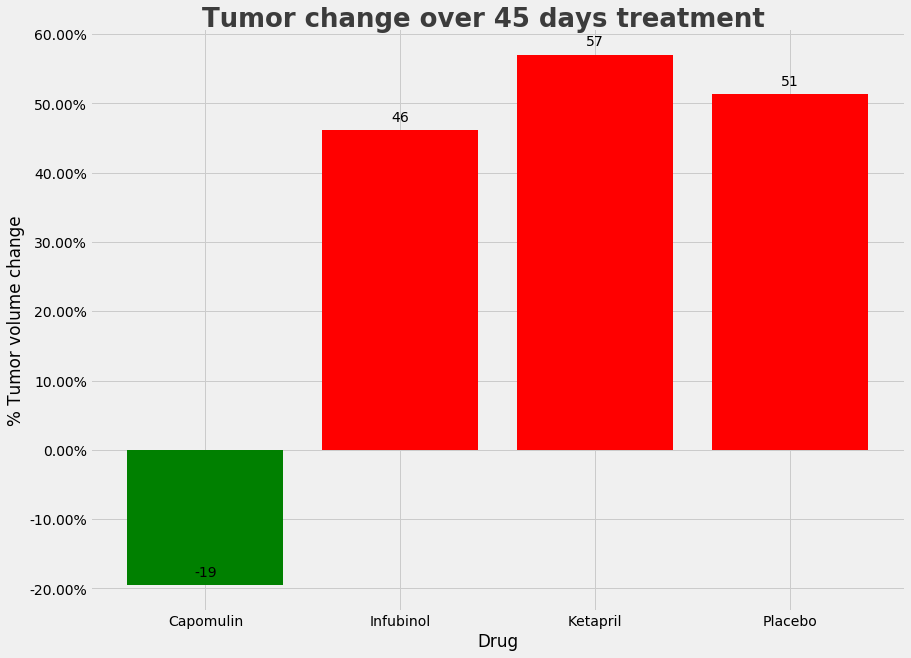

In [125]:
#set fivethirtyeight styles
mpl.style.use('fivethirtyeight')

#initialize figure 
f, ax = plt.subplots(figsize=(13,10))

#calculate colors for plot
mask = totals['Tumor'] < 0
colors = np.array(['r']*len(totals))
colors[mask.values] = 'g'

#plot df
g = plt.bar(totals.index,totals['Tumor'],color=colors,width=0.8)

def autolabel(rects, ax):
    # Get y-axis height to calculate label position from.
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom

    for rect in rects:
        height = rect.get_height()

        # Fraction of axis height taken up by this rectangle
        p_height = (height / y_height)

        # If we can fit the label above the column, do that;
        # otherwise, put it inside the column.
        if p_height > 0.95: # arbitrary; 95% looked good to me.
            label_position = height - (y_height * 0.05)
        else:
            label_position = height + (y_height * 0.01)

        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(g, ax)

#set titles
f.suptitle('Tumor change over 45 days treatment', y=0.91, fontsize = 26, weight = 'bold', alpha = .75)
plt.xlabel('Drug')
plt.ylabel('% Tumor volume change')
plt.xticks(np.arange(4),totals['Drug'].tolist(),rotation=0)

vals = ax.get_yticks()
ax.set_yticklabels(['{:3.2f}%'.format(x) for x in vals])

plt.show()

# Observations
* Capomuline is the only drugs that reduced tumors
* The metastasic sites were also minimal for it
* Over 90% of mice were still alive after the treatment by Capomulin comparing to less than 60% for other drugs 
* Other drugs have no influence on the tumor just like Placebo